In [1]:
import requests
from requests.auth import HTTPBasicAuth
import json
import pandas as pd
import matplotlib.pyplot as plt

#### `/register`

`one time run with your username, password, email`

In [ ]:
register_url = 'https://api.watttime.org/register'
params = {'username': 'your_username',
         'password': 'your_password',
         'email': 'your_email_id',
         'org': 'optional_param'}
rsp = requests.post(register_url, json=params)
print(rsp.text)

#### `/login`

In [ ]:
login_url = 'https://api.watttime.org/login'
rsp = requests.get(login_url, auth=HTTPBasicAuth('your_username', 'your_password'))
TOKEN = rsp.json()['token']
print(TOKEN)

#### Checking Access - `/v3/my-access`

In [4]:
url = "https://api.watttime.org/v3/my-access"
headers = {"Authorization": f"Bearer {TOKEN}"}
params = {}
response = requests.get(url, headers=headers, params=params)
response.raise_for_status()
print(response.json())
'''
for i in response.json()['signal_types']:
    for key, value in i.items():
      print(f"{key} \n\n {value} \n\n")
'''

{'signal_types': [{'signal_type': 'co2_moer', 'regions': [{'region': 'CAISO_NORTH', 'region_full_name': 'California ISO Northern', 'parent': 'CAISO', 'data_point_period_seconds': 300, 'endpoints': [{'endpoint': 'v3/historical', 'models': [{'model': '2022-10-01', 'data_start': '2020-01-01', 'train_start': '2020-03-01', 'train_end': '2022-03-01', 'type': 'binned_regression'}, {'model': '2023-03-01', 'data_start': '2020-03-01', 'train_start': '2021-01-01', 'train_end': '2023-03-01', 'type': 'binned_regression'}]}, {'endpoint': 'v3/forecast', 'models': [{'model': '2022-10-01', 'data_start': '2021-12-31', 'train_start': '2020-01-01', 'train_end': '2021-12-31'}, {'model': '2023-03-01', 'data_start': '2023-01-01', 'train_start': '2021-01-01', 'train_end': '2023-01-01'}]}]}]}, {'signal_type': 'health_damage', 'regions': [{'region': 'CAISO_NORTH', 'region_full_name': 'California ISO Northern', 'parent': 'CAISO', 'data_point_period_seconds': 300, 'endpoints': [{'endpoint': 'v3/historical', 'mode

'\nfor i in response.json()[\'signal_types\']:\n    for key, value in i.items():\n      print(f"{key} \n\n {value} \n\n")\n'

In [5]:
# Assuming response.json() returns the JSON data
json_data = response.json()

# Extract the 'signal_types' key
data = json_data['signal_types']


# Normalize the JSON data
# Normalize the JSON data
df = pd.json_normalize(data, record_path=['regions', 'endpoints', 'models'],
                       meta=['signal_type', ['regions', 'region'],
                             ['regions', 'region_full_name'], ['regions', 'parent'],
                             ['regions', 'data_point_period_seconds'],
                             ['regions', 'endpoints', 'endpoint']])

# Display the DataFrame
for i in df.columns:
    print(f"\n----{i}------\n {df[i].value_counts()} \n----------\n")


----model------
 model
2022-10-01    4
2023-03-01    2
2022-06-03    1
Name: count, dtype: int64 
----------


----data_start------
 data_start
2020-01-01    2
2021-12-31    2
2020-03-01    1
2023-01-01    1
2019-12-31    1
Name: count, dtype: int64 
----------


----train_start------
 train_start
2020-03-01    2
2021-01-01    2
2020-01-01    2
2019-01-01    1
Name: count, dtype: int64 
----------


----train_end------
 train_end
2022-03-01    2
2021-12-31    2
2023-03-01    1
2023-01-01    1
2019-12-31    1
Name: count, dtype: int64 
----------


----type------
 type
binned_regression    3
Name: count, dtype: int64 
----------


----signal_type------
 signal_type
co2_moer         4
health_damage    3
Name: count, dtype: int64 
----------


----regions.region------
 regions.region
CAISO_NORTH    7
Name: count, dtype: int64 
----------


----regions.region_full_name------
 regions.region_full_name
California ISO Northern    7
Name: count, dtype: int64 
----------


----regions.parent--

#### Grid Region: `/v3/region-from-loc`

In [6]:
url = "https://api.watttime.org/v3/region-from-loc"

headers = {"Authorization": f"Bearer {TOKEN}"}
params = {"latitude": "32.372", "longitude": "-87.519", "signal_type": "co2_moer"}
response = requests.get(url, headers=headers, params=params)
response.raise_for_status()
print(response.json())

{'region': 'SOCO', 'region_full_name': 'Southern Co Services Inc', 'signal_type': 'co2_moer'}


In [7]:
url = "https://api.watttime.org/v3/region-from-loc"

headers = {"Authorization": f"Bearer {TOKEN}"}
params = {"latitude": "42.372", "longitude": "-76.519", "signal_type": "health_damage"}
response = requests.get(url, headers=headers, params=params)
response.raise_for_status()
print(response.json())

{'region': 'NYISO_CENTRAL', 'region_full_name': 'NYISO Central', 'signal_type': 'health_damage'}


#### Forecasting: `/v3/forecast`

###### Forecast data of region `CAISO_NORTH` and singal_type `co2_moer`

In [8]:
url = "https://api.watttime.org/v3/forecast"

headers = {"Authorization": f"Bearer {TOKEN}"}
params = {
    "region": "CAISO_NORTH",
    "signal_type": "co2_moer",
}
response = requests.get(url, headers=headers, params=params)
response.raise_for_status()

json_data = response.json()
data = json_data['data']
data

df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['point_time']).dt.date
df['Time'] = pd.to_datetime(df['point_time']).dt.time
df['Hour'] = pd.to_datetime(df['point_time']).dt.hour
df.drop(columns=['point_time'], inplace=True)
df

,value,Date,Time,Hour
0,930.6,2024-10-03,05:50:00,5
1,930.6,2024-10-03,05:55:00,5
2,930.3,2024-10-03,06:00:00,6
3,930.2,2024-10-03,06:05:00,6
4,931.1,2024-10-03,06:10:00,6
...,...,...,...,...
283,933.7,2024-10-04,05:25:00,5
284,934.1,2024-10-04,05:30:00,5
285,931.7,2024-10-04,05:35:00,5
286,931.1,2024-10-04,05:40:00,5


In [9]:
df['Date'].value_counts()

,count
Date,
2024-10-03,218
2024-10-04,70


In [10]:
unique_dates = df['Date'].unique()
unique_dates

array([datetime.date(2024, 10, 3), datetime.date(2024, 10, 4)],
      dtype=object)

###### For 1st Date of Prediction

In [11]:
df_date_01 = df[pd.to_datetime(df['Date']) == pd.to_datetime(unique_dates[0])]
df_date_01.shape

(218, 4)

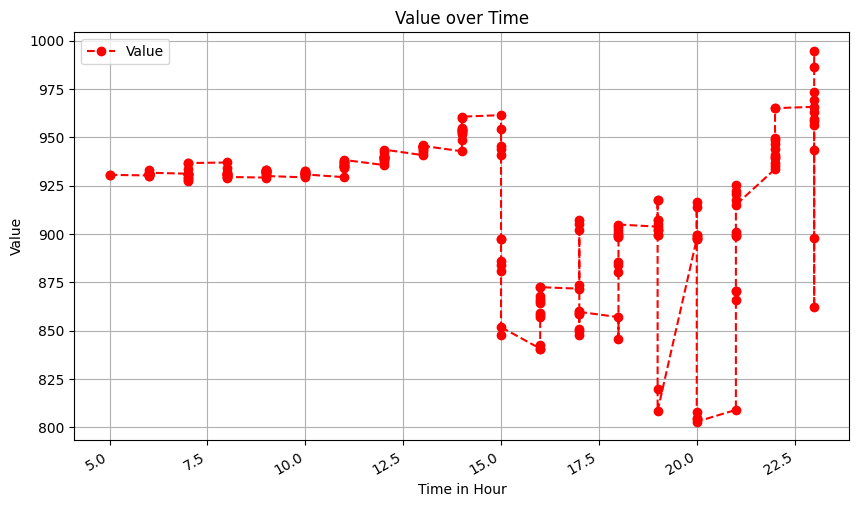

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df_date_01['Hour'], df_date_01['value'], marker='o', linestyle="--", color='red', label='Value')

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Time in Hour')
plt.ylabel('Value')
plt.title('Value over Time')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

###### For 2nd Date of Forecast

In [13]:
df_date_02 = df[pd.to_datetime(df['Date']) == pd.to_datetime(unique_dates[1])]
df_date_02.shape

(70, 4)

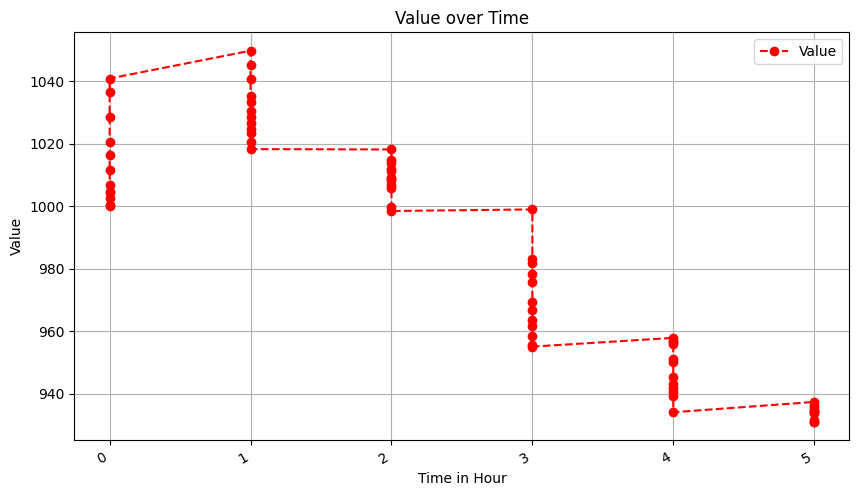

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df_date_02['Hour'], df_date_02['value'], marker='o', linestyle="--", color='red', label='Value')

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Time in Hour')
plt.ylabel('Value')
plt.title('Value over Time')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()